In [79]:
# import statements
import pandas as pd
import pymongo
from pymongo import MongoClient
from pprint import pprint
import matplotlib.pyplot as plt
import datetime as dt
from time import sleep
from kafka3 import KafkaConsumer
import ast

In [9]:
# get mongo client 
client = MongoClient('192.168.0.100', 27017) 
db = client.fit3182_assignment_db
collection = db.fit3182_partb

### Part B Task 2 Question 1a

<IPython.core.display.Javascript object>


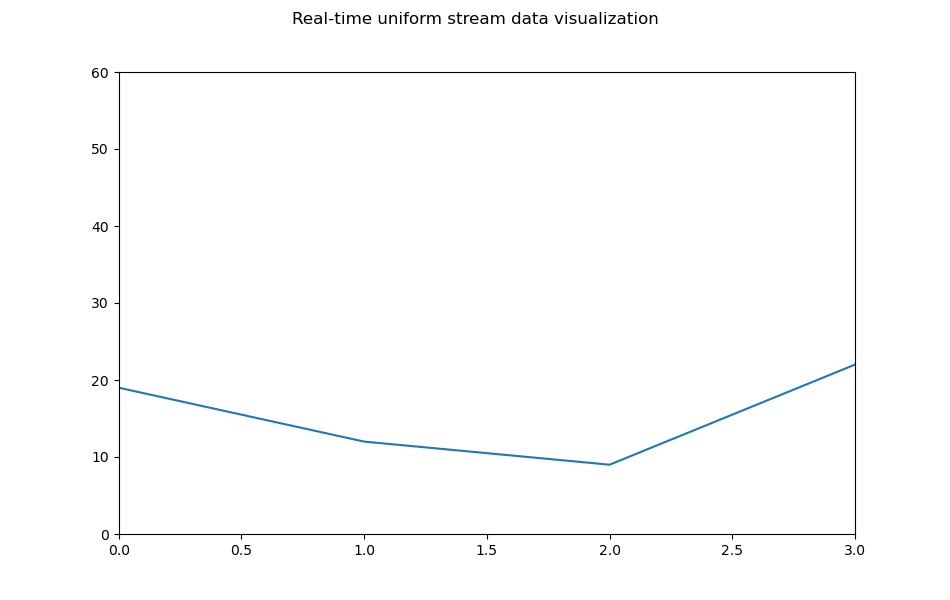

KeyboardInterrupt: 

In [113]:
# this line is needed for the inline display of graphs in Jupyter Notebook
%matplotlib notebook

topic = 'stream_1'
hostip = "192.168.0.100" # change it to your IP

def connect_kafka_consumer():
    _consumer = None
    try:
         _consumer = KafkaConsumer(topic,
                                   consumer_timeout_ms=10000, # stop iteration if no message after 10 sec
                                   auto_offset_reset='earliest', # comment this if you don't want to consume earliest available message
                                   bootstrap_servers=[f'{hostip}:9092'],
                                   api_version=(0, 10))
    except Exception as ex:
        print('Exception while connecting Kafka')
        print(str(ex))
    finally:
        return _consumer

def init_plots():
    try:
        width = 9.5
        height = 6
        fig = plt.figure(figsize=(width,height)) # create new figure
        ax = fig.add_subplot(111) # adding the subplot axes to the given grid position
        fig.suptitle('Real-time uniform stream data visualization') # giving figure a title
        ax.set_xlabel('Arrival Date')
        ax.set_ylabel('Air Temperature')
        ax.set_ylim(0,60) 
        ax.set_yticks([0,20,40,60])
        ax.set_xlim(0,3) 
        fig.show() # displaying the figure
        fig.canvas.draw() # drawing on the canvas
        return fig, ax
    except Exception as ex:
        print(str(ex))
    
def consume_messages(consumer, fig, ax):
    try:
        # container for x and y values
        x, y = [], []
        # print('Waiting for messages')
        for message in consumer:
            data = ast.literal_eval(message.value.decode("utf-8"))
            x.append(data['created_date'])
            y.append(data['air_temperature_celcius'])
            # we start plotting only when we have 10 data points
            if len(y) > 10:
                ax.clear()
                ax.plot(x, y)
                ax.set_xlabel('Arrival Date')
                ax.set_ylabel('Air Temperature')
                ax.set_ylim(0,60) 
                ax.set_yticks([0,20,40,60])
                ax.set_xlim(0,3) 
                fig.canvas.draw()
                x.pop(0) # removing the item in the first position
                y.pop(0)
        plt.close('all')
    except Exception as ex:
        print(str(ex))
    
if __name__ == '__main__':
    
    consumer = connect_kafka_consumer()
    fig, ax = init_plots()
    consume_messages(consumer, fig, ax)

### Part B Task 2 Question 2a

/tmp/ipykernel_1356/908975418.py:26: MatplotlibDeprecationWarning: The close_event function was deprecated in Matplotlib 3.6 and will be removed two minor releases later. Use callbacks.process('close_event', CloseEvent(...)) instead.
  plt.close('all')


<IPython.core.display.Javascript object>


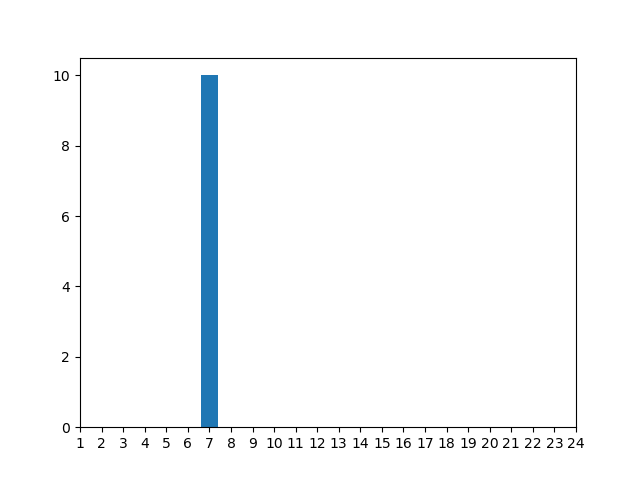

In [114]:
graphdata = collection.aggregate([
    {
        "$project": { "total_fire": {"$size": "$hotspots_data"} ,  "created_date":1 , "_id": 0 
            
        }
    }
])
hotspot_temp = []
temp = []
### get total number of fire and datetime
for i in graphdata:
    x = i["total_fire"]
    hotspot_temp.append(x)
    temp.append(i["created_date"])
    
date_temp = []    
### this section takes the datetime of string , convert to datetime and output hours in integer 
for i in temp:
    date_time = dt.datetime.strptime(i,'%d/%m/%Y %H:%M:%S') 
    date_temp.append(date_time.time().hour)

    ### list is respoinsible for all the number in a day so that i can just find fire for each hour
hours_list = [1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24]
y_range =[1,5,10,15,20]

plt.close('all')
ax = plt.axes()
plt.bar(date_temp, hotspot_temp)


ax.set_xticks(hours_list)


In [45]:
import folium

In [94]:
fmap = folium.Map(location = [-37.840935, 144.946457],zoom_start =10 )

In [95]:
### getting the necessary data to plot like lat and long and all the extra such as the cause , air temperature, surface temperature.
item = collection.aggregate([
    {"$unwind": "$hotspots_data"},
    {"$project": {"fire_status": "$fire_status" , "air_temperature": "$air_temperature_celcius" , 
                "surface_temperature": "$hotspots_data.surface_temperature_celcius" , "relative humidity": "$relative_humidity" , 
               "confidence": "$hotspots_data.confidence" , "latitude": "$latitude" , "longtitude":  "$longitude"} }
])

### html to input into the marker ###
for row in item:
    info = """<!DOCTYPE html>
    <p>Type: {}<p>""".format(row["fire_status"]) + """
    <p>Air Temperature Celcius: {}<p>""".format(row["air_temperature"]) + """
    <p>Surface Temperature Celcius: {}<p>""".format(row["surface_temperature"]) + """
    <p>Relative Humidity: {}<p>""".format(row["relative humidity"]) + """
     <p>Confidence: {}<p>""".format(row["confidence"]) + """

    """
    
    # if natural fire, mark as blue, else red
    if row['fire_status'] == 'natural':
        print("blue")
        folium.Marker(location = [row["latitude"] ,row["longtitude"] ] ,popup =folium.Popup(html = info,script =True) ,icon = folium.Icon(color="blue",icon ="info-sign")
                     ).add_to(fmap)
    else:
        print("red")
        folium.Marker(location = [row["latitude"] ,row["longtitude"] ] ,popup =folium.Popup(html = info,script =True) ,icon = folium.Icon(color="red",icon ="info-sign")
                     ).add_to(fmap)

red
red
red
red
red
red
red
red
red
red
red
red
red
red
red
red
red
red
red
red
red
red
red
red
red
red
red
red
red
red
red
red
red
red
red
red
red
red
red
red
red
red
red
red
red
red
red
red
red
red
red
red
red
red
red
red
red
red
red
red
red
red
red
red
red
red
red
red
red
red
red
red
red
red
red
red
red
red
red
red
red
red
red
red
red
red
red
red
red
red
red
red
red
red
red
red
red
red
red
red
red
red
red
red
red
red
red
red
red
red
red
blue
blue
blue
blue
blue
blue
blue
blue
blue
blue
red
red
red
red
red
red
red
red
red
red
red
red
red
red
red
red
red
red
red
red
blue
blue
blue
blue
blue
blue
blue
blue
blue
blue
red
red
red
red
red
red
red
red
red
red
red
red
red
red
red
red
red
red
red
red
blue
blue
blue
blue
blue
blue
blue
blue
blue
blue
red
red
red
red
red
red
red
red
red
red
red
red
red
red
red
red
red
red
red
red
red
red
red
red
red
red
red
red
red
red
red
red
red
red
red
red
red
red
red
red
red
red
red
red
red
red
red
red
red
red
red
red
red
red
red
red
red
red
red
red
red
re

In [96]:
 fmap